In [1]:
import pickle
with open("../circuit.pickle", 'rb') as handle:
    qc = pickle.load(handle)

In [2]:
calibrations = qc.calibrations
rzx_cal = calibrations['rzx']
rx_cal = calibrations['rx']

In [3]:
rx_cal.keys()

dict_keys([((0,), (0.3333333328625214,)), ((3,), (0.3333333328625215,)), ((1,), (0.33333333507070523,)), ((2,), (0.33333333507070523,))])

In [4]:
type(list(rx_cal.values())[0])

qiskit.pulse.schedule.ScheduleBlock

In [5]:
custom_rx_sched = list(rx_cal.values())[0]
print(custom_rx_sched)

ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.44959049003489476, amp=0.01726511975439483, angle=0), DriveChannel(0)), name="rx(0.333)", transform=AlignLeft())


In [6]:
from qiskit import QuantumCircuit
import numpy as np

circuit = QuantumCircuit(1, name='custom_rx')
circuit.rx(0,0)
custom_rx = circuit.to_gate()

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import InterleavedRB
from qiskit_braket_provider import AWSBraketProvider

In [8]:
provider = AWSBraketProvider()
backend = provider.get_backend('Harmony')

In [9]:
backend.target.add_instruction(custom_rx, {(0,): InstructionProperties(calibration=custom_rx_sched)})

In [10]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0] # make sure it is the qubit added in the backend target

int_exp = InterleavedRB(
    custom_rx, qubits, lengths, num_samples=num_samples, seed=seed, backend=backend)

In [11]:
int_expdata = int_exp.run(backend).block_for_results()
int_results = int_expdata.analysis_results()

/Users/amey/anaconda3/envs/simuq/lib/python3.10/site-packages/qiskit_braket_provider/providers/adapter.py:425: UserWarning: Circuit transpilation resulted in global phase shift
  warnings.warn("Circuit transpilation resulted in global phase shift")


KeyError: 'custom_rx'

In [ ]:
# View result data
display(int_expdata.figure(0))
for result in int_results:
    print(result)

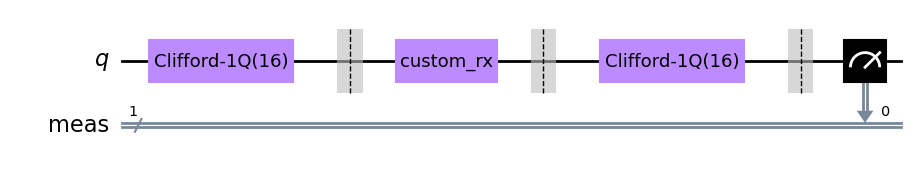

In [13]:
int_exp.circuits()[1].draw(output='mpl')

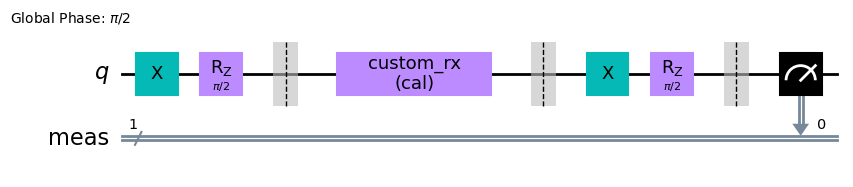

In [14]:
# you can see that the transpiled circuits contain the calibrations
int_exp._transpiled_circuits()[1].draw(output='mpl')